# 베스트 모델 - 와인 이진분류

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from google.colab import files
up = files.upload()
filename = list(up.keys())[0]
filename

Saving wine.csv to wine.csv


'wine.csv'

In [3]:
df = pd.read_csv(filename, header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [4]:
np.unique(df.values[:, -1], return_counts=True)

(array([0., 1.]), array([4898, 1599]))

In [5]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.values[:, :-1])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.values[:, -1], stratify = df.values[:, -1], random_state = seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

* 모델 정의/설정

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential([
                    Dense(30, input_dim = 12, activation = 'relu'),
                    Dense(12, activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

* 모델 저장관련 설정

In [12]:
import os
if not os.path.exists('model'):
    os.mkdir('model')

In [13]:
# model_path = 'model/best_wine.h5'
model_path = 'model/wine_{epoch:03d}_{val_loss:.4f}.h5'

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=1, save_best_only=True
)

* 모델 학습 및 저장

In [ ]:
hist = model.fit(X_train, y_train, validation_split=0.2, verbose=0,
                 epochs=200, batch_size=200,
                 callbacks = [checkpoint])

* 베스트 모델 로딩한 후 평가

In [17]:
from tensorflow.keras.models import load_model
best_model_path = 'model/wine_080_0.0120.h5'
best_model = load_model(best_model_path)
best_model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9982


[0.007739788852632046, 0.9981538653373718]

* 학습과정 시각화

In [18]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

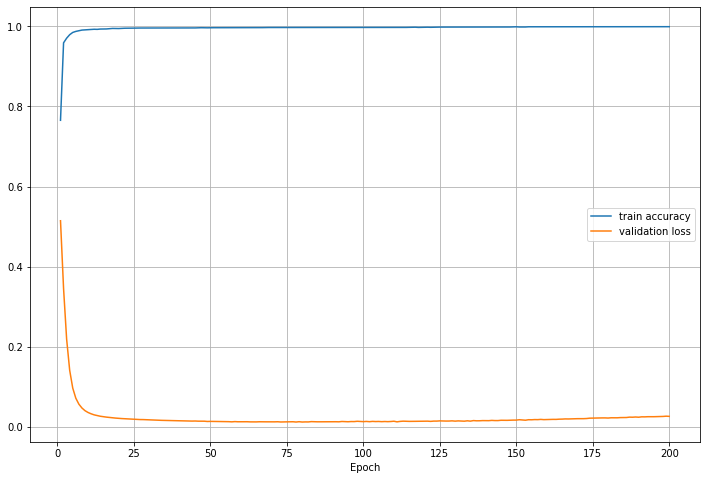

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()